## Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.drop(columns='id',inplace=True)

In [9]:
df.head() 

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
Desc=[]

for i in df.columns:
    Desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum()/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
        
    ])

In [11]:
pd.DataFrame(data=Desc,columns=['Data Feature','Data Types','NULL','Null Percentage','Unique','Unique Sample'])

,Data Feature,Data Types,NULL,Null Percentage,Unique,Unique Sample
0,Gender,object,0,0.0,2,"[Male, Female]"
1,Age,int64,0,0.0,66,"[30, 83]"
2,Driving_License,int64,0,0.0,2,"[0, 1]"
3,Region_Code,float64,0,0.0,53,"[29.0, 20.0]"
4,Previously_Insured,int64,0,0.0,2,"[1, 0]"
5,Vehicle_Age,object,0,0.0,3,"[< 1 Year, > 2 Years]"
6,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
7,Annual_Premium,float64,0,0.0,48838,"[39466.0, 28637.0]"
8,Policy_Sales_Channel,float64,0,0.0,155,"[83.0, 1.0]"
9,Vintage,int64,0,0.0,290,"[230, 178]"


## Exploratory Data Analysis

In [12]:
#### Melihat perbandingan Response custmer tertarik/ tdk 
(df['Response'].value_counts()/len(df)*100).round(2)

0    87.74
1    12.26
Name: Response, dtype: float64

dari data diatas, dapat dilihat bahwa ada kurang lebih 87% blm tertarik (imbalance)

In [13]:
(df['Driving_License'].value_counts()/len(df)*100).round(2) #kita melihat perbandingan yg punya SIM dg yg tidak pny

1    99.79
0     0.21
Name: Driving_License, dtype: float64

Dari data diatas, rata2 orang kebanyakan mempunyai SIM. 

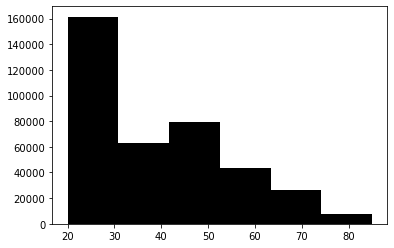

In [14]:
plt.hist(x=df['Age'],bins=6,color='black')
plt.show() #saya bagi dalam 6 kategori, disini ternyata umur 20 mendominasi dengan krg lebih 160rb + orang

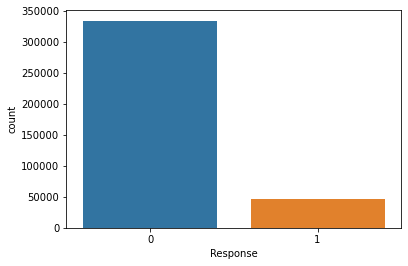

In [108]:
sns.countplot(df['Response'])  #dari sini bisa dilihat bahwa banyak sekali yg tidak tertarik

In [121]:
gender=df.groupby(['Gender','Response'])
gender['Age'].mean() 

Gender  Response
0       0           40.373375
        1           44.200526
1       0           35.692945
        1           42.235634
Name: Age, dtype: float64

Disini bisa disimpulkan bahwa rata2 usia yg tidak tertarik , adalah 35-40an. tetapi 40-45 keatas sudah mulai tertarik terhadap asuransi

In [15]:
def re_cat(x):
    if x == 'Yes':
        return '1'
    else :
        return '0'
#disini kita bikin fungsi yg akan menggantikan KATEGORI MENJADI NUMERIC

In [16]:
df['Vehicle_Damage_re'] = df['Vehicle_Damage'].apply(re_cat) 

In [17]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_re
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0


In [18]:
# setelah kita menjadikan numerik, kita bisa liat perbandingan yg rusak maupun tda 
(df['Vehicle_Damage_re'].value_counts()/len(df)*100).round(2)

1    50.49
0    49.51
Name: Vehicle_Damage_re, dtype: float64

In [19]:
## Feature Engineering & Feature Selection

In [20]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_re
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0


In [21]:
df.drop(columns=['Vehicle_Damage'],inplace=True)

In [22]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_re
0,Male,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,1
1,Male,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,0
2,Male,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,1
3,Male,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,0
4,Female,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,0


In [23]:
#### Label Encoding
df['Gender'] = df['Gender'].map({
    'Male':0,
    'Female':1
})

In [24]:
### One Hot Encoding 
df = pd.get_dummies(data=df,columns=['Vehicle_Age'])

In [25]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_re,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,40454.0,26.0,217,1,1,0,0,1
1,0,76,1,3.0,0,33536.0,26.0,183,0,0,1,0,0
2,0,47,1,28.0,0,38294.0,26.0,27,1,1,0,0,1
3,0,21,1,11.0,1,28619.0,152.0,203,0,0,0,1,0
4,1,29,1,41.0,1,27496.0,152.0,39,0,0,0,1,0


In [26]:
###  Splitting Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop(columns='Response')
y = df['Response']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8,random_state=42)

In [30]:
#### Machine Learning Modelling

#  Base Model LogReg

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
modelLog = LogisticRegression()

In [33]:
modelLog.fit(X_train, y_train)

C:\Users\benay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
modelLog.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Base Model KN Classifier & Eva Matrix KN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.metrics import classification_report,confusion_matrix, recall_score,precision_score,f1_score,accuracy_score

In [37]:
modelKNN = KNeighborsClassifier()

In [38]:
modelKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_KNN= modelKNN.predict(X_test)

In [40]:
Acc_KNN = accuracy_score(y_test,y_KNN)
Acc_KNN

0.8564718847576815

In [41]:
prec_KNN = precision_score(y_test,y_KNN)

In [42]:
rec_KNN = recall_score(y_test,y_KNN)

In [43]:
f1_KNN = f1_score(y_test,y_KNN)

In [44]:
print(classification_report(y_test,y_KNN))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     66699
           1       0.21      0.05      0.08      9523

    accuracy                           0.86     76222
   macro avg       0.54      0.51      0.50     76222
weighted avg       0.79      0.86      0.82     76222



In [45]:
cm_KNN = confusion_matrix(y_test,y_KNN,labels=[1,0])

In [46]:
df_KNN = pd.DataFrame(data=cm_KNN,columns=['pred 1','pred 0'],index=['Aktual 1','Aktual 0'])

In [47]:
df_KNN

,pred 1,pred 0
Aktual 1,501,9022
Aktual 0,1918,64781


In [48]:
### Evaluation Matrix

# Base SVM

In [49]:
from sklearn.svm import SVC

In [50]:
model_1 = SVC(max_iter=200)

In [51]:
model_1.fit(X_train,y_train)

C:\Users\benay\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=200)

In [52]:
y_base = model_1.predict(X_test)

In [53]:
cm_base = confusion_matrix (y_test,y_base,labels=[1,0])

In [54]:
df_cm = pd.DataFrame(data=cm_base,index=['Akt1','Akt0'],columns=['Pred1','Pred0'])

In [55]:
df_cm

,Pred1,Pred0
Akt1,3911,5612
Akt0,30572,36127


In [56]:
print(classification_report(y_test,y_base))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67     66699
           1       0.11      0.41      0.18      9523

    accuracy                           0.53     76222
   macro avg       0.49      0.48      0.42     76222
weighted avg       0.77      0.53      0.61     76222



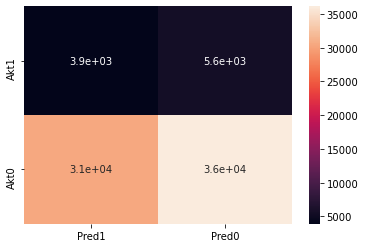

In [57]:
sns.heatmap(df_cm,annot=True)

# Evaluation LogReg Base

In [58]:
y_pred = modelLog.predict(X_test)

In [59]:
Acc_logReg= accuracy_score(y_test,y_pred)
Acc_logReg

0.8750491983941644

In [60]:
prec_log=precision_score(y_test,y_pred)

In [61]:
rec_log=recall_score(y_test,y_pred)

In [62]:
f1_log=f1_score(y_test,y_pred)

In [63]:
recall_score(y_test,y_pred,pos_label=0)

0.9999700145429467

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.33      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.60      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [65]:
cm = confusion_matrix(y_test,y_pred,labels=[1,0])

In [66]:
df_cm = pd.DataFrame(data=cm,columns=['pred 1','pred 0'],index=['Aktual 1','Aktual 0'])

In [67]:
df_cm

,pred 1,pred 0
Aktual 1,1,9522
Aktual 0,2,66697


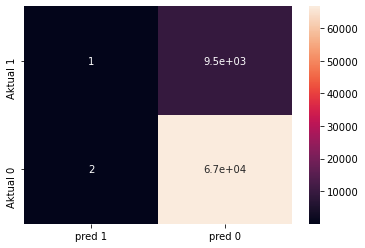

In [68]:
sns.heatmap(df_cm,annot=True)


dari data diatas terlihat jelas bahwa model memprediksi krg lebih selalu ke tdk tertarik maka hrs di handling imbalance menggunakan metode OS/US/SMOTE

# Tuning

In [69]:
df_train = pd.concat([X_train,y_train],axis=1)

In [70]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damage_re,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
332803,1,39,1,15.0,0,52906.0,55.0,227,1,1,0,0,1
116248,0,38,1,11.0,0,23038.0,26.0,29,1,1,0,0,0
255005,0,22,1,30.0,1,45318.0,152.0,166,0,0,1,0,0
317474,1,23,1,41.0,1,29132.0,151.0,277,0,0,1,0,0
344212,0,56,1,48.0,0,2630.0,154.0,155,1,0,0,1,0


In [71]:
df_train['Response'].value_counts() #mlihat data yg tertarik dg yg tdk tertarik. spy nti bisa di oversmple

0    267700
1     37187
Name: Response, dtype: int64

In [72]:
non_interest = df_train[df_train['Response']== 0] #Kelas Majority
interest = df_train[df_train['Response']== 1] #Kelas Minority

In [73]:
from sklearn.utils import resample

In [74]:
interest_oversample = resample(interest, ##kelas minority
                           replace = True,
                           n_samples=len(non_interest), ##Jumlah dari kelas Majority
                           random_state=42)

In [75]:
df_OverSampled= pd.concat([non_interest,interest_oversample])

In [76]:
df_OverSampled['Response'].value_counts()

1    267700
0    267700
Name: Response, dtype: int64

In [77]:
X_train_OverSample = df_OverSampled.drop(columns='Response')
y_train_OverSample = df_OverSampled['Response']

In [78]:
modelOS = LogisticRegression()

In [79]:
modelOS.fit(X_train_OverSample,y_train_OverSample)

C:\Users\benay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_predOS = modelOS.predict(X_test)

In [81]:
print(classification_report(y_test,y_predOS))

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     66699
           1       0.17      0.54      0.26      9523

    accuracy                           0.62     76222
   macro avg       0.54      0.59      0.50     76222
weighted avg       0.81      0.62      0.68     76222



In [82]:
cm_OS = confusion_matrix(y_test,y_predOS,labels=[1,0])

In [83]:
df_OS = pd.DataFrame(data = cm_OS,index=["Akt 1","Akt 0"],columns=["Pred 1","Pred 0"])

In [84]:
df_OS

,Pred 1,Pred 0
Akt 1,5156,4367
Akt 0,24571,42128


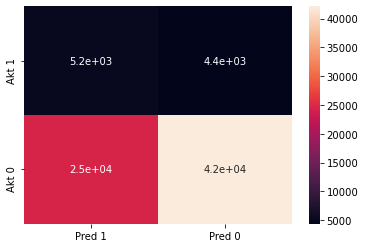

In [85]:
sns.heatmap(df_OS,annot=True)
plt.show()

In [86]:
# Menggunakan SMOTE

In [87]:
import imblearn

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE(random_state=42)

In [90]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damage_re,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
332803,1,39,1,15.0,0,52906.0,55.0,227,1,1,0,0
116248,0,38,1,11.0,0,23038.0,26.0,29,1,1,0,0
255005,0,22,1,30.0,1,45318.0,152.0,166,0,0,1,0
317474,1,23,1,41.0,1,29132.0,151.0,277,0,0,1,0
344212,0,56,1,48.0,0,2630.0,154.0,155,1,0,0,1


In [91]:
y_train.head()

332803    1
116248    0
255005    0
317474    0
344212    0
Name: Response, dtype: int64

In [92]:
X_train_sm, y_train_sm = sm.fit_sample(X_train,y_train)

In [93]:
df_train['Response'].value_counts()

0    267700
1     37187
Name: Response, dtype: int64

In [94]:
df_SMOTE = pd.concat([X_train_sm,y_train_sm],axis=1)

In [95]:
len(y_train_sm==1)/2

267700.0

In [96]:
len(X_train_sm==0)

535400

In [97]:
modelSMOTE = LogisticRegression()

In [98]:
modelSMOTE.fit(X_train_sm,y_train_sm)

C:\Users\benay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred_sm = modelSMOTE.predict(X_test)

In [100]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     66699
           1       0.28      0.83      0.42      9523

    accuracy                           0.71     76222
   macro avg       0.62      0.76      0.62     76222
weighted avg       0.88      0.71      0.76     76222



In [101]:
cm_sm = confusion_matrix(y_test,y_pred_sm,labels=[1,0])

In [102]:
df_sm = pd.DataFrame(data = cm_sm,index=["Akt 1","Akt 0"],columns=["Pred 1","Pred 0"])

In [103]:
df_sm

,Pred 1,Pred 0
Akt 1,7865,1658
Akt 0,20113,46586


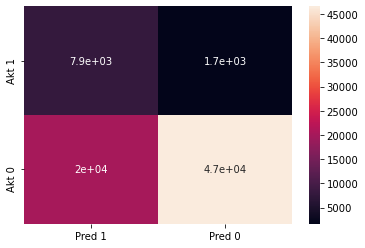

In [104]:
sns.heatmap(df_sm,annot=True)
plt.show()